In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df=pd.read_csv("C:/Users/KIIT/Desktop/bank-full.csv",sep=';')

In [13]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [15]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [17]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})
df = pd.get_dummies(df, drop_first=True)
df.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,False,False,...,False,False,False,True,False,False,False,False,False,True
1,44,29,5,151,1,-1,0,0,False,False,...,False,False,False,True,False,False,False,False,False,True
2,33,2,5,76,1,-1,0,0,False,True,...,False,False,False,True,False,False,False,False,False,True
3,47,1506,5,92,1,-1,0,0,True,False,...,False,False,False,True,False,False,False,False,False,True
4,33,1,5,198,1,-1,0,0,False,False,...,False,False,False,True,False,False,False,False,False,True


In [19]:
X = df.drop('y', axis=1)
y = df['y']

In [21]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
y_pred = clf.predict(X_test)

In [31]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.87
Precision: 0.46
Recall: 0.48
F1-Score: 0.47


In [33]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[7344  608]
 [ 563  528]]


In [60]:
from sklearn.tree import plot_tree

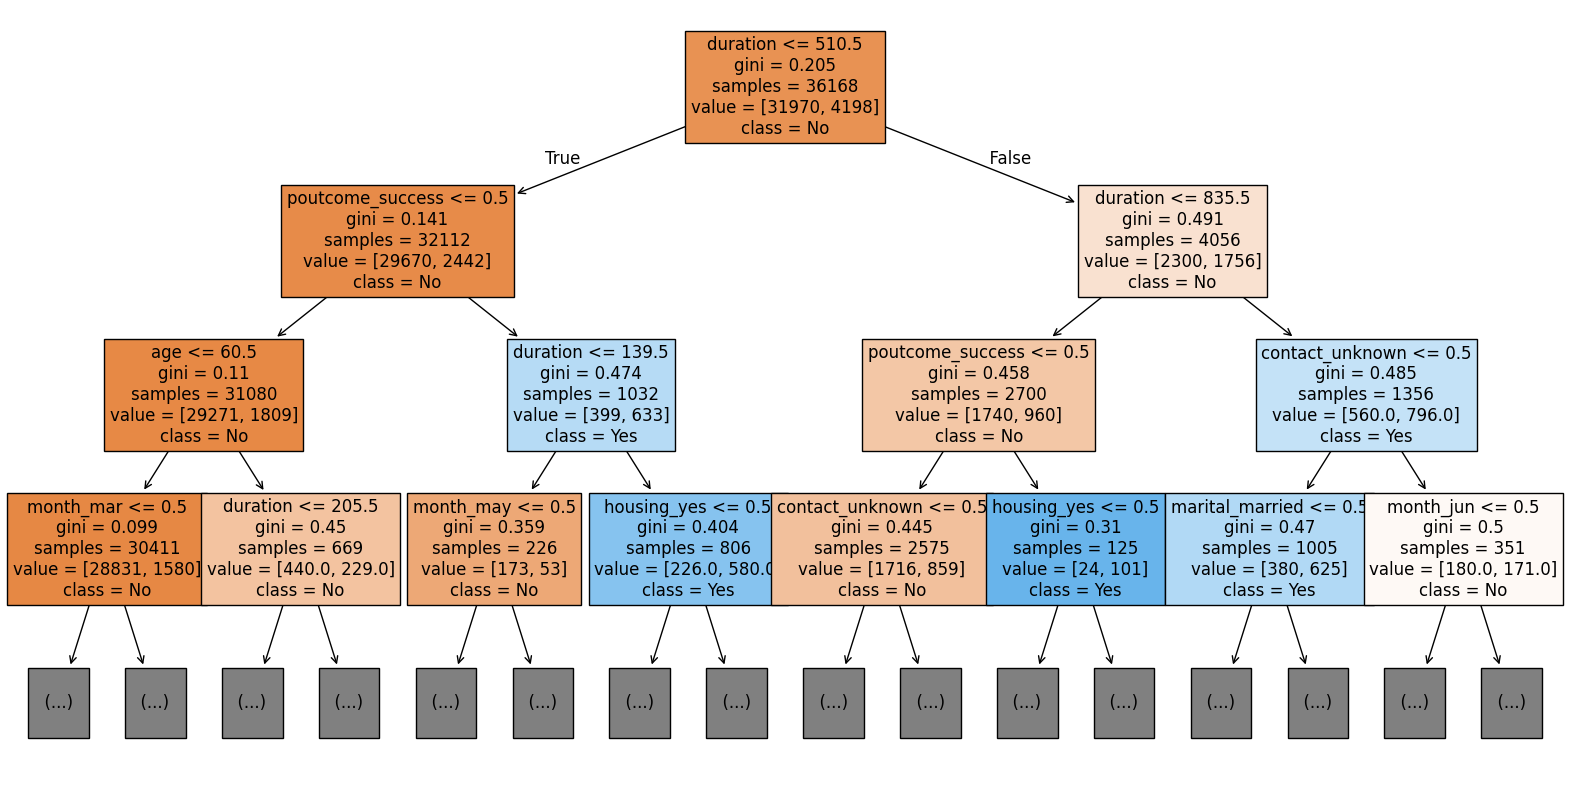

In [78]:
plt.figure(figsize=(20, 10))
plot_tree(
    clf, 
    filled=True, 
    feature_names=X.columns, 
    class_names=['No', 'Yes'], 
    max_depth=3, 
    fontsize=12
)
plt.show()

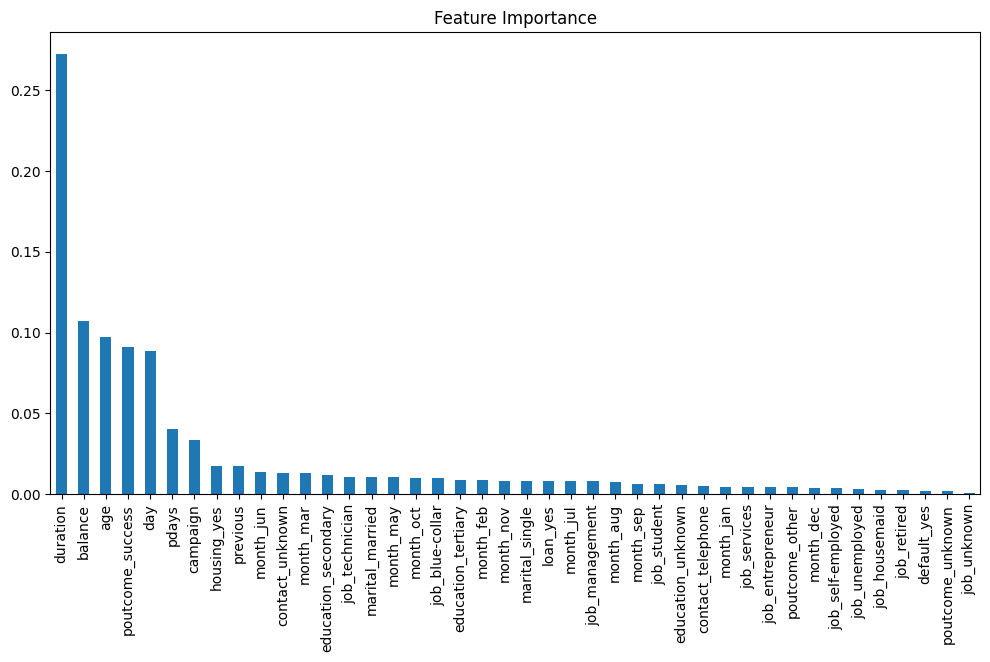

In [39]:
feature_importance = pd.Series(clf.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title('Feature Importance')
plt.show()